In [221]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import MatplotlibDeprecationWarning

# this in general not advised, but for this specific notebook
# I'd like to ignore some deprecation warnings by matplotlib
import warnings
warnings.filterwarnings(
    "ignore", category=MatplotlibDeprecationWarning
)

In [222]:
import astropy .units as u
from astropy.coordinates import SkyCoord 
import gammapy

In [223]:
from gammapy.data import EventList

##### Let's created one by reading the Fermi-LAT 3FHL event list:

In [224]:
events_3fh1 = EventList.read("/Users/dhruvkumar/Desktop/fermi-3fhl-gc-events.fits.gz")

In [225]:
# let's HAve a look at the data
events_3fh1.table

ENERGY,RA,DEC,L,B,THETA,PHI,ZENITH_ANGLE,EARTH_AZIMUTH_ANGLE,TIME,EVENT_ID,RUN_ID,RECON_VERSION,CALIB_VERSION [3],EVENT_CLASS [32],EVENT_TYPE [32],CONVERSION_TYPE,LIVETIME,DIFRSP0,DIFRSP1,DIFRSP2,DIFRSP3,DIFRSP4
MeV,deg,deg,deg,deg,deg,deg,deg,deg,s,,,,,,,,s,,,,,
float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,int32,int32,int16,int16,bool,bool,int16,float64,float32,float32,float32,float32,float32
12186.642,260.45935,-33.553337,353.36273,1.7538676,71.977325,125.50694,59.22307,231.79672,239572401.29222104,1823040,239571670,0,0 .. 0,False .. True,False .. True,0,238.57837238907814,0.0,0.0,0.0,0.0,0.0
25496.598,261.37506,-34.395004,353.09607,0.6520652,42.49406,278.49347,41.092773,227.89838,239577842.16217342,550833,239577663,0,0 .. 0,False .. True,False .. False,1,176.16850754618645,0.0,0.0,0.0,0.0,0.0
15621.498,259.56973,-33.409416,353.05673,2.4450684,64.32412,234.22194,66.526794,232.75734,239578244.7997108,1353175,239577663,0,0 .. 0,False .. True,False .. False,1,9.392075657844543,0.0,0.0,0.0,0.0,0.0
12816.32,273.95883,-25.340391,6.45856,-4.0548873,43.292503,142.87392,13.232716,108.02273,239605914.66160735,9636241,239601276,0,0 .. 0,False .. True,False .. False,1,4.034786552190781,0.0,0.0,0.0,0.0,0.0
18988.387,260.8568,-36.355804,351.23734,-0.101912394,26.916113,290.39337,23.8726,212.91147,239611913.14460415,11233188,239606871,0,0 .. 0,False .. True,False .. True,0,131.60132896900177,0.0,0.0,0.0,0.0,0.0
11610.23,266.15518,-26.224436,2.1986027,1.6034819,35.77363,274.53387,23.537594,232.64166,239623554.55414733,14156811,239618329,0,0 .. 0,False .. True,False .. False,1,74.98110938072205,0.0,0.0,0.0,0.0,0.0
13960.802,271.44742,-29.615316,1.6267247,-4.1431155,25.917883,238.0368,15.037035,123.32094,239634549.1748726,14140569,239629788,0,0 .. 0,False .. True,False .. False,1,106.37336817383766,0.0,0.0,0.0,0.0,0.0
10477.372,266.3981,-28.96814,359.97003,-0.011748177,39.091587,275.5457,33.02354,229.59308,239635161.87982982,15688393,239629788,0,0 .. 0,False .. True,False .. True,0,214.62817406654358,0.0,0.0,0.0,0.0,0.0


In [226]:
len(events_3fh1.table)

32843

In [227]:
events_3fh1.table.colnames   # name of the columns

['ENERGY',
 'RA',
 'DEC',
 'L',
 'B',
 'THETA',
 'PHI',
 'ZENITH_ANGLE',
 'EARTH_AZIMUTH_ANGLE',
 'TIME',
 'EVENT_ID',
 'RUN_ID',
 'RECON_VERSION',
 'CALIB_VERSION',
 'EVENT_CLASS',
 'EVENT_TYPE',
 'CONVERSION_TYPE',
 'LIVETIME',
 'DIFRSP0',
 'DIFRSP1',
 'DIFRSP2',
 'DIFRSP3',
 'DIFRSP4']

In [228]:
# Conversions along the units
x = events_3fh1.energy.to("GeV") # energy is in GeV
y = events_3fh1.energy.to("TeV") # energy is in TeV

In [229]:
x,y

(<Quantity [12.186643, 25.4966  , 15.621499, ..., 32.095707, 18.465784,
            14.457251] GeV>,
 <Quantity [0.01218664, 0.0254966 , 0.0156215 , ..., 0.0320957 , 0.01846578,
            0.01445725] TeV>)

In [230]:
events_3fh1.galactic

<SkyCoord (Galactic): (l, b) in deg
    [(353.36228879,  1.75408483), (353.09562941,  0.6522806 ),
     (353.05628243,  2.44528685), ..., (359.10295505, -0.1359316 ),
     (359.85157506, -0.08269984), (353.71795506, -0.26883694)]>

In [231]:
events_3fh1.time

<Time object: scale='tt' format='mjd' value=[54682.82946153 54682.89243456 54682.89709472 ... 57236.75267735
 57233.37455141 57233.44802852]>

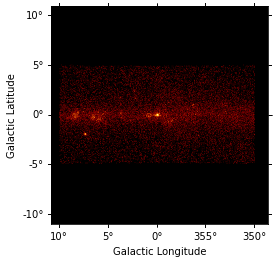

In [232]:
events_3fh1.plot_image()

In [233]:
# select all events within a radius of 1 deg around center
from regions import CircleSkyRegion

center = SkyCoord("0d", "0d", frame="galactic")  # Centre
region = CircleSkyRegion(center, radius=1 * u.deg) # specify the region
events_gc_3fhl = events_3fh1.select_region(region) # select the region

# sort events by energy
events_gc_3fhl.table.sort("ENERGY")

# and show highest energy photon
events_gc_3fhl.energy[-1].to("TeV") # hightest Energy bust {As we have taken it from the last of table}

<Quantity 1.91785925 TeV>

### Maps

In [234]:
from gammapy.maps import Map

In [235]:
gc_3fh1 = Map.create(
    width=(30 * u.degree , 30*u.degree),
    skydir = center,
    proj="CAR",
    binsz=0.05 * u.degree,
    map_type="wcs",
    frame="galactic"
)

In [236]:
gc_3fh1

WcsNDMap

	geom  : WcsGeom 
 	axes  : ['lon', 'lat']
	shape : (600, 600)
	ndim  : 2
	unit  : 
	dtype : float32

In [237]:
print(gc_3fh1.geom) # to get more idea about the geometry

WcsGeom

	axes       : ['lon', 'lat']
	shape      : (600, 600)
	ndim       : 2
	frame      : galactic
	projection : CAR
	center     : 0.0 deg, 0.0 deg
	width      : 30.0 deg x 30.0 deg
	wcs ref    : 0.0 deg, 0.0 deg



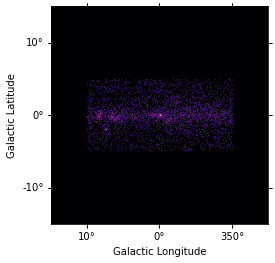

In [238]:
gc_3fh1.fill_events(events_3fh1)
gc_3fh1.plot(stretch="sqrt",cmap='inferno');

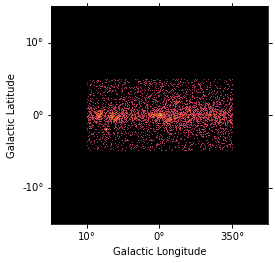

In [239]:
gc_3fh1.fill_events(events_3fh1)
gc_3fh1.plot(stretch="log",cmap='inferno'); # Much sensetative

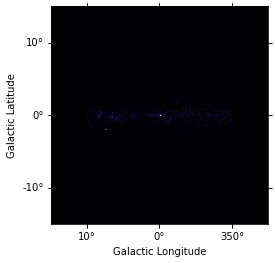

In [240]:
gc_3fh1.fill_events(events_3fh1)
gc_3fh1.plot(stretch="linear",cmap='inferno');

In [241]:
gc_3fh1.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [242]:
print(f"Total number of counts in the image: {gc_3fh1.data.sum():.0f}")

Total number of counts in the image: 98529


In [243]:
from gammapy.maps import MapAxis

In [244]:
energy_axis = MapAxis.from_energy_bounds(
    energy_min = "10 GeV", energy_max="3 TeV", nbin=5
)

In [245]:
print(energy_axis)

MapAxis

	name       : energy    
	unit       : 'TeV'     
	nbins      : 5         
	node type  : edges     
	edges min  : 1.0e-02 TeV
	edges max  : 3.0e+00 TeV
	interp     : log       



In [246]:
# 3D data Cube
gc_3fh1_cube = Map.create(
    width = (30*u.degree,30*u.degree),
    skydir = center,
    proj="CAR",
    binsz=0.05 * u.degree,
    map_type="wcs",
    frame = "galactic",
    axes =[energy_axis]
)

In [247]:
print(gc_3fh1_cube)

WcsNDMap

	geom  : WcsGeom 
 	axes  : ['lon', 'lat', 'energy']
	shape : (600, 600, 5)
	ndim  : 3
	unit  : 
	dtype : float32



In [248]:
gc_3fh1_cube.fill_events(events_3fh1)

In [249]:
gc_3fh1_cube_smoothed = gc_3fh1_cube.smooth(
    kernel ="gauss",width=0.1 *u.degree
)

In [250]:
gc_3fh1_cube_smoothed.plot_interactive(cmap='inferno')

interactive(children=(SelectionSlider(continuous_update=False, description='Select energy:', layout=Layout(wid…

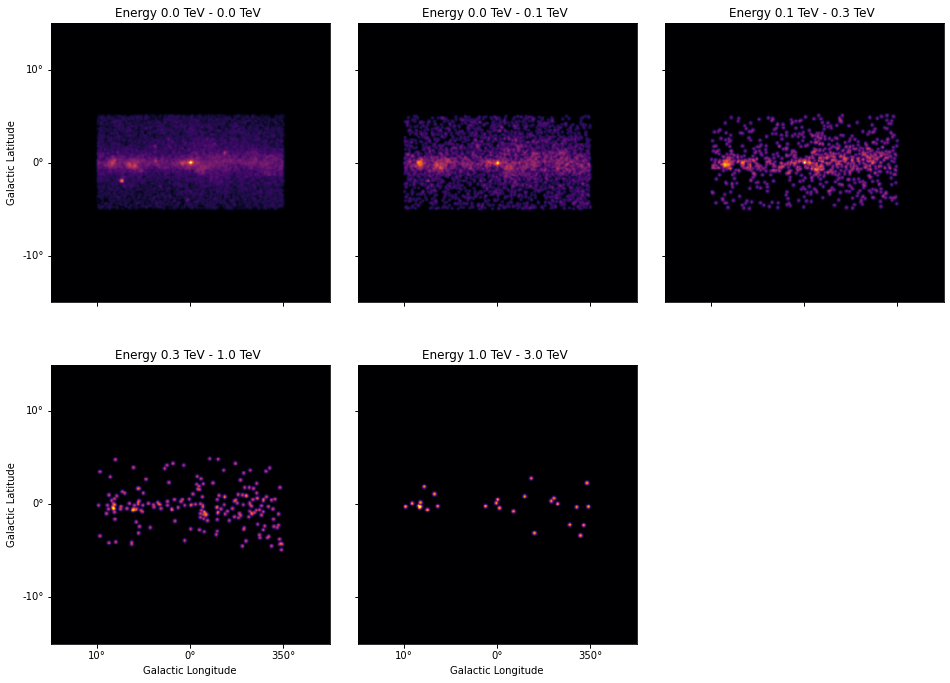

In [251]:
gc_3fh1_cube_smoothed.plot_grid(
    ncols=3 ,figsize=(16,12),cmap='inferno',stretch="sqrt"
);

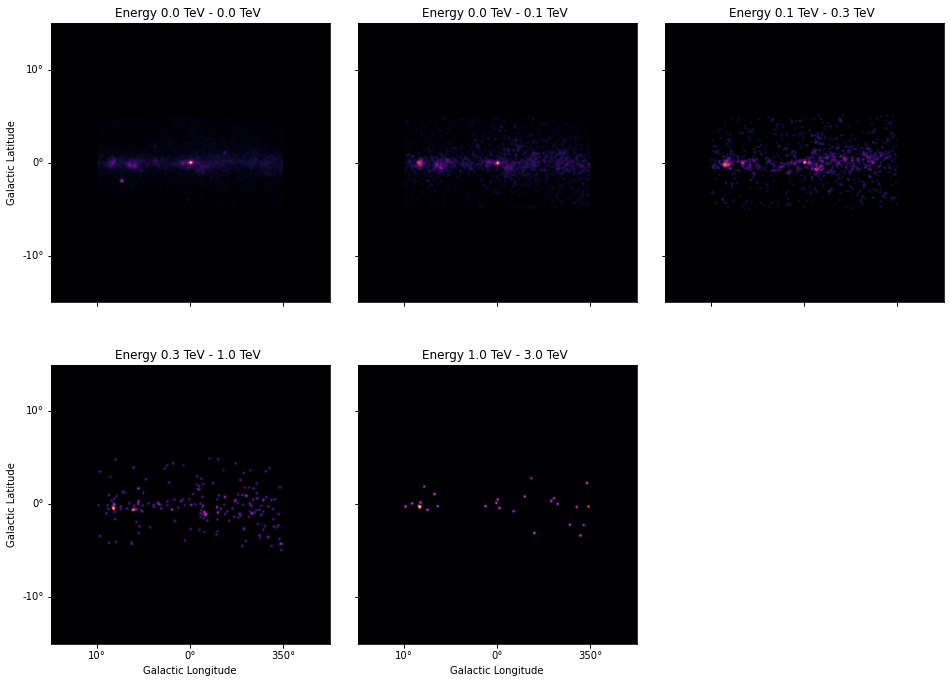

In [252]:
gc_3fh1_cube_smoothed.plot_grid(
    ncols=3 ,figsize=(16,12),cmap='inferno',stretch="linear"
);

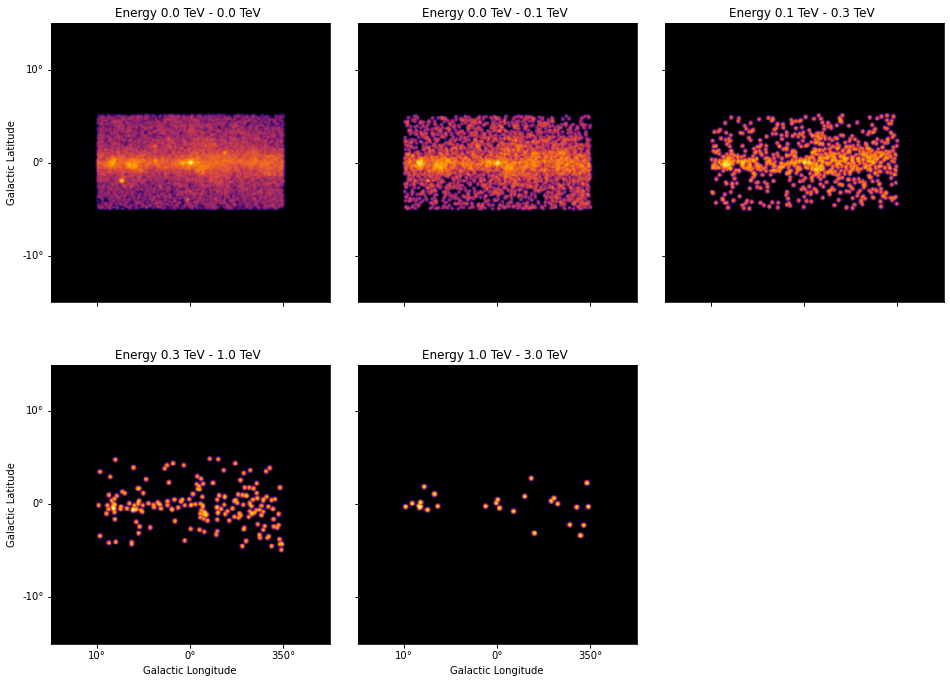

In [253]:
gc_3fh1_cube_smoothed.plot_grid(
    ncols=3 ,figsize=(16,12),cmap='inferno',stretch="log"
);

__*We can also do a rectangular cutout of a certain region in the image:*__

In [254]:
# define centre and cutout of the rectangular region
center = SkyCoord(0,0,unit ='deg',frame ='galactic')
gc_3fh1_cutout = gc_3fh1_cube_smoothed.cutout(center,9*u.deg) # width of the cutout = 9 degrees
gc_3fh1_cutout.plot_interactive(stretch='sqrt',cmap='inferno'); # Great!!!

interactive(children=(SelectionSlider(continuous_update=False, description='Select energy:', layout=Layout(wid…

### Source Catalogs

In [255]:
from gammapy.catalog import SourceCatalog3FHL

In [256]:
fermi_3fh1 = SourceCatalog3FHL("/Users/dhruvkumar/Desktop/gll_psch_v13.fit.gz")
fermi_3fh1.table

Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Signif_Avg,Pivot_Energy,Flux_Density,Unc_Flux_Density,Flux,Unc_Flux,Energy_Flux,Unc_Energy_Flux,Signif_Curve,SpectrumType,Spectral_Index,Unc_Spectral_Index,beta,Unc_beta,PowerLaw_Index,Unc_PowerLaw_Index,Flux_Band [5],"Unc_Flux_Band [5,2]",nuFnu [5],Sqrt_TS_Band [5],Npred,HEP_Energy,HEP_Prob,Variability_BayesBlocks,Extended_Source_Name,ASSOC_GAM,TEVCAT_FLAG,ASSOC_TEV,CLASS,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,Redshift,NuPeak_obs
,deg,deg,deg,deg,deg,deg,deg,,,GeV,1 / (cm2 GeV s),1 / (cm2 GeV s),1 / (cm2 s),1 / (cm2 s),erg / (cm2 s),erg / (cm2 s),,,,,,,,,1 / (cm2 s),1 / (cm2 s),erg / (cm2 s),,,GeV,,,,,,,,,,,,,Hz
bytes18,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes11,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes18,bytes18,bytes1,bytes21,bytes7,bytes26,bytes26,float32,float32,float32,float32
3FHL J0001.2-0748,0.3107,-7.8075,89.0094,-67.3118,0.0424,0.0424,--,64,5.362,23.73,5.3174e-13,2.0975e-13,2.9593e-11,1.1704e-11,1.6752e-12,1.0743e-12,1.02,PowerLaw,1.6724,0.8274,0.5916,0.7129,2.2226,0.4808,1.1127661e-11 .. 1.1422301e-22,-6.0763976e-12 .. 6.529277e-12,3.533989e-13 .. 1.1789072e-22,3.1458344 .. 0.0,7.63,86.975,0.9964,1,,3FGL J0001.2-0748,N,,bll,PMN J0001-0746,,0.9974,0.9721,--,306196370000000.0
3FHL J0001.9-4155,0.4849,-41.9303,334.1216,-72.0697,0.1018,0.1018,--,429,5.638,28.42,5.4253e-13,1.6839e-13,4.3230e-11,1.3428e-11,3.4900e-12,1.8276e-12,0.45,PowerLaw,1.7819,0.4941,0.1187,0.2798,1.9418,0.3100,2.1003905e-11 .. 1.9287885e-18,-8.032091e-12 .. 5.8594097e-12,6.7452245e-13 .. 2.078675e-18,4.899907 .. 0.0,12.51,266.625,0.9622,1,,3FGL J0002.2-4152,N,,bcu,1RXS J000135.5-415519,,0.9960,0.0000,--,6309576500000000.0
3FHL J0002.1-6728,0.5283,-67.4825,310.0868,-48.9549,0.0357,0.0357,--,386,8.470,20.82,1.2062e-12,3.2106e-13,5.0093e-11,1.3349e-11,2.3058e-12,9.5580e-13,1.53,PowerLaw,1.8109,0.6260,0.7933,0.5956,2.4285,0.3710,2.4550664e-11 .. 1.9009976e-21,-8.634195e-12 .. 4.8021903e-12,7.7340695e-13 .. 1.9026535e-21,5.900217 .. 0.0,17.11,52.152,0.9988,1,,3FGL J0002.0-6722,N,,bcu,SUMSS J000215-672653,,0.0000,0.9395,--,4466832000000000.0
3FHL J0003.3-5248,0.8300,-52.8150,318.9245,-62.7936,0.0425,0.0425,--,145,7.229,23.66,7.5065e-13,2.3102e-13,4.1560e-11,1.2839e-11,2.2874e-12,1.1145e-12,1.70,PowerLaw,1.6010,0.5644,0.9972,0.1721,2.2481,0.3732,2.0886386e-11 .. 7.5867555e-23,-8.143967e-12 .. 5.31299e-12,6.6265456e-13 .. 7.800202e-23,5.298393 .. 0.0,13.02,67.310,0.9636,1,,3FGL J0003.2-5246,N,,bcu,RBS 0006,,0.9996,0.9716,--,7.079464e+16
3FHL J0007.0+7303,1.7647,73.0560,119.6625,10.4666,0.0101,0.0101,--,277,75.265,12.80,1.7436e-10,7.5950e-12,1.5308e-09,6.1341e-11,3.6785e-11,1.5973e-12,3.24,LogParabola,3.1751,0.2103,0.9021,0.2659,3.8315,0.1141,1.3514667e-09 .. 3.839895e-18,-5.7581186e-11 .. 4.060418e-12,4.109739e-11 .. 2.9231144e-18,71.33829 .. 0.0,654.15,60.292,0.9972,1,,3FGL J0007.0+7302,E,CTA 1,PSR,LAT PSR J0007+7303,,1.0000,0.0000,--,--
3FHL J0007.9+4711,1.9931,47.1920,115.3093,-15.0354,0.0196,0.0196,--,302,17.774,17.19,5.9778e-12,8.7683e-13,1.5131e-10,2.2181e-11,5.1444e-12,1.0540e-12,0.56,PowerLaw,2.6783,0.4196,0.1696,0.3282,2.8588,0.2685,1.0582407e-10 .. 1.9819723e-16,-1.7538379e-11 .. 4.823511e-12,3.278615e-12 .. 1.8668298e-16,15.209969 .. 0.0,50.95,68.152,0.9759,1,,3FGL J0008.0+4713,N,,bll,MG4 J000800+4712,,1.0000,0.9873,0.2800,2511884200000000.0
3FHL J0008.4-2339,2.1243,-23.6514,50.2908,-79.7021,0.0366,0.0366,--,517,9.679,16.96,3.0610e-12,7.3475e-13,7.4602e-11,1.7896e-11,2.4733e-12,8.1716e-13,0.34,PowerLaw,2.7388,0.7145,0.1737,0.5618,2.9070,0.4520,5.804992e-11 .. 1.1117311e-20,-1.4419374e-11 .. 6.10661e-12,1.7951775e-12 .. 1.0403958e-20,9.133706 .. 0.0,19.83,71.122,0.9968,1,,3FGL J0008.6-2340,N,,bll,RBS 0016,,0.9996,0.9673,0.1470,524807800000000.0
3FHL J0009.1+0628,2.2874,6.4814,1

--------  
__*Important*__

In [257]:
# lets perform some operation on it
# sort table by signifience
fermi_3fh1.table.sort("Signif_Avg")
# invert the order to find the highest value and take top ten
Top_10_TS_3fh1 = fermi_3fh1.table[::-1][:10]
# print top ten signifientsources with association and source class
Top_10_TS_3fh1[["Source_Name","ASSOC1","ASSOC2","CLASS","Signif_Avg"]]
# Here, we get the top ten sources according to their Signif_Avg

Source_Name,ASSOC1,ASSOC2,CLASS,Signif_Avg
bytes18,bytes26,bytes26,bytes7,float32
3FHL J0534.5+2201,Crab Nebula,,PWN,168.641
3FHL J1104.4+3812,Mkn 421,,BLL,144.406
3FHL J0835.3-4510,PSR J0835-4510,Vela X field,PSR,138.801
3FHL J0633.9+1746,PSR J0633+1746,,PSR,99.734
3FHL J1555.7+1111,PG 1553+113,,BLL,94.411
3FHL J2158.8-3013,PKS 2155-304,,bll,83.488
3FHL J1653.8+3945,Mkn 501,,BLL,82.948
3FHL J1709.7-4429,PSR J1709-4429,,PSR,76.407
3FHL J0007.0+7303,LAT PSR J0007+7303,,PSR,75.265


In [258]:
# To Access an Individual Source 
PG_1553_3fh1 = fermi_3fh1["3FHL J1555.7+1111"]

In [259]:
type(PG_1553_3fh1)

gammapy.catalog.fermi.SourceCatalogObject3FHL

In [260]:
print(PG_1553_3fh1) # all the imformation 


*** Basic info ***

Catalog row index (zero-based) : 1551
Source name          : 3FHL J1555.7+1111
Extended name        :                   
Associations     : PG 1553+113, PG 1553+113, 3FGL J1555.7+1111
ASSOC_PROB_BAY   : 1.000
ASSOC_PROB_LR    : 0.999
Class            : BLL    
TeVCat flag      : P

*** Other info ***

Significance (10 GeV - 2 TeV)    : 94.411
Npred                            : 849.6

HEP Energy       : 265.227 GeV
HEP Probability  : 0.999
Bayesian Blocks  : 3
Redshift         : --
NuPeak_obs       : 2.93e+15 Hz

*** Position info ***

RA                   : 238.931 deg
DEC                  : 11.190 deg
GLON                 : 21.910 deg
GLAT                 : 43.962 deg

Semimajor (95%)      : 0.0089 deg
Semiminor (95%)      : 0.0089 deg
Position angle (95%) : 0.00 deg
ROI number           : 407

*** Spectral fit info ***

Spectrum type                    : LogParabola
Significance curvature           : 5.9
Power-law spectral index         : 2.117 +- 0.041
LogParabo

/opt/anaconda3/lib/python3.8/site-packages/gammapy/catalog/fermi.py:1072: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  ss += "{:<16s} : {:.3f}\n".format("Redshift", d["Redshift"])


In [261]:
PG_1553_3fh1.data["RAJ2000"],PG_1553_3fh1.data["DEJ2000"] # like this we can handle indivaidual attricutes

(<Quantity 238.93123 deg>, <Quantity 11.189861 deg>)

------

In [262]:
# To get the value of a particular attribute in the catalog
Crab_Nebula_3fh1 = fermi_3fh1["Crab Nebula"]
print(Crab_Nebula_3fh1.data["Signif_Avg"])

168.64082


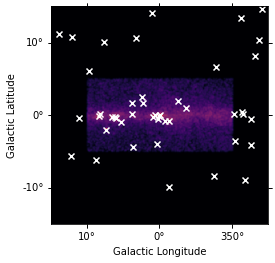

In [263]:
# Let's Plot of  the Sources on Image
ax = gc_3fh1.smooth("0.1 deg").plot(
    stretch="sqrt",cmap="inferno");

positions = fermi_3fh1.positions
ax.scatter(positions.data.lon.deg,
          positions.data.lat.deg,
          transform=ax.get_transform("icrs"),
          color ="w",
          marker ="x")

## __Spectral Models and Flux Points__


__In the previous section we learned how access basic data from individual sources in the catalog. Now we will go one step further and explore the full spectral information of sources.__

__As a first example we will start with the Crab Nebula:__

In [264]:
crab_3fh1 = fermi_3fh1["Crab Nebula"]
crab_3fh1_model = crab_3fh1.sky_model()
print(crab_3fh1_model)

SkyModel

  Name                      : 3FHL J0534.5+2201
  Datasets names            : None
  Spectral model type       : PowerLawSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  Parameters:
    index                   :      2.220   +/-    0.02             
    amplitude               :   1.71e-10   +/- 3.4e-12 1 / (cm2 GeV s)
    reference    (frozen)   :     22.726       GeV         
    lon_0                   :     83.635   +/-    0.00 deg         
    lat_0                   :     22.019   +/-    0.00 deg         




In [265]:
type(crab_3fh1_model) # it is now an SkyModel object

gammapy.modeling.models.cube.SkyModel

In [266]:
crab_3fh1_spec = crab_3fh1_model.spectral_model

__The crab_3fhl.spectral_model is an instance of the PowerLaw2SpectralModel model, with the parameter values and errors taken from the 3FHL catalog.__

*Let's plot the spectral model in the energy range between 10 GeV and 2000 GeV:*

Text(0, 0.5, 'Flux[1/$cm^2$ s TeV]')

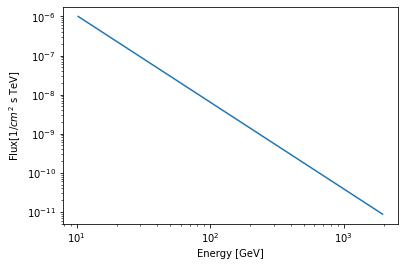

In [267]:
ax_crab_3fh1 = crab_3fh1_spec.plot(energy_bounds= [10, 2000] * u.GeV) # energy_bound is used insted of enegy_range
plt.ylabel("Flux[1/$cm^2$ s TeV]")

__To compute the differential flux at 100 GeV we can simply call the model like normal Python function and convert to the desired units:__



In [268]:
crab_3fh1_spec(100 * u.GeV).to("cm-2 s-1 GeV-1") # Flux at 100 GeV energy

<Quantity 6.38489128e-12 1 / (cm2 GeV s)>

In [269]:
crab_3fh1_spec([100,200,300] * u.GeV).to("cm-2 s-1 TeV-1") # Flux at 100,200,300 TeV energy

<Quantity [6.38489128e-09, 1.37026831e-09, 5.56989696e-10] 1 / (cm2 s TeV)>

In [270]:
# Flux
crab_3fh1_spec.integral(
    energy_min = 10 * u.GeV, energy_max = 2 * u.TeV
).to("cm-2 s-1")
# Flux

<Quantity 8.67457342e-09 1 / (cm2 s)>

In [271]:
crab_3fh1.data["Flux"]

<Quantity 8.658909e-09 1 / (cm2 s)>

In [272]:
# Energy Flux
crab_3fh1_spec.energy_flux(
    energy_min= 10*u.GeV,energy_max= 2*u.TeV 
).to("J m-2 s-1")

<Quantity 5.31148917e-13 J / (m2 s)>

In [303]:
# Flux point data of Crab
print(crab_3fh1.flux_points)

FluxPoints
----------

  geom                   : RegionGeom
  axes                   : ['lon', 'lat', 'energy']
  shape                  : (1, 1, 5)
  quantities             : ['norm', 'norm_errp', 'norm_errn', 'norm_ul', 'sqrt_ts', 'is_ul']
  ref. model             : pl
  n_sigma                : 1
  n_sigma_ul             : 2
  sqrt_ts_threshold_ul   : 1
  sed type init          : flux



In [304]:
crab_3fh1.flux_points.table

AttributeError: 'FluxPoints' object has no attribute 'table'

AttributeError: 'FluxPoints' object has no attribute 'to_sed_type'

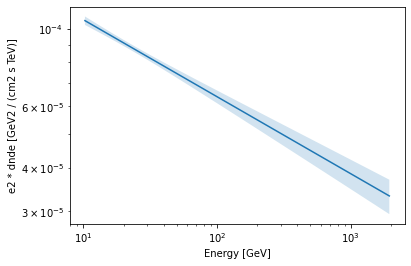

In [310]:
ax = crab_3fh1_spec.plot(energy_bounds=[10, 2000] * u.GeV, energy_power=2)

ax = crab_3fh1_spec.plot_error(energy_bounds=[10, 2000] * u.GeV,energy_power=2, facecolor="tab:blue")

fp = crab_3fh1.flux_points.to_sed_type("dnde")
fp.plot(ax=ax, energy_power=2);

In [311]:
help(FluxPoints)

Help on class FluxPoints in module gammapy.estimators.points.core:

class FluxPoints(gammapy.estimators.map.core.FluxMaps)
 |  FluxPoints(data, reference_model, meta=None, gti=None, filter_success_nan=True)
 |  
 |  Flux points container.
 |  
 |  The supported formats are described here: :ref:`gadf:flux-points`
 |  
 |  In summary, the following formats and minimum required columns are:
 |  
 |  * Format ``dnde``: columns ``e_ref`` and ``dnde``
 |  * Format ``e2dnde``: columns ``e_ref``, ``e2dnde``
 |  * Format ``flux``: columns ``e_min``, ``e_max``, ``flux``
 |  * Format ``eflux``: columns ``e_min``, ``e_max``, ``eflux``
 |  
 |  Parameters
 |  ----------
 |  table : `~astropy.table.Table`
 |      Table with flux point data
 |  
 |  Attributes
 |  ----------
 |  table : `~astropy.table.Table`
 |      Table with flux point data
 |  
 |  Examples
 |  --------
 |  The `FluxPoints` object is most easily created by reading a file with
 |  flux points given in one of the formats documented